# AVOCADO 가격 예측 (Facebook Prophet ) 



# STEP #0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터 입니다. (2018년도 weekly 데이터)  
- 아보카도 거래량과 가격이 나와 있습니다. 

컬럼 설명 :

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold 
- 4046 - Total number of avocados with PLU 4046 sold - PLU는 농산물 코드입니다
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# STEP #1: 데이터 준비

### Prophet 라이브러리

- install : 
     pip install fbprophet
     
- 위 에러 발생시 : 
    conda install -c conda-forge fbprophet
 

- 레퍼런스 : https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [ ]:
# import libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

# 에러가 안나니
# Prophet 이 구글 코랩 서버에 깔려있다라는 것

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [14]:
# avocado.csv 데이터 읽기
df =  pd.read_csv('avocado.csv', index_col= 0)

In [7]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# STEP #2: EDA(Exploratory Data Analysis) :  탐색적 데이터 분석

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### 필요없는 맨 처음 컬럼을 제거하시오

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 데이터의 날짜가 뒤죽박죽 입니다. 날짜로 정렬하시오.

In [1]:
df['Date'].info()

NameError: name 'df' is not defined

In [ ]:
df.sort_values('Date', inplace= True)

In [17]:
df = df.sort_values('Date')

In [33]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


### 날짜별로 가격이 어떻게 변하는지 간단하게 확인하시오. (plot 이용)

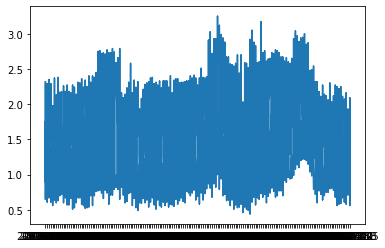

In [19]:
plt.plot(df['Date'] , df['AveragePrice'] )


In [34]:
# 이걸 나오는것을 익혀야됨


df.groupby('Date')['AveragePrice'].mean()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [35]:
df_date = df.groupby('Date')['AveragePrice'].mean()

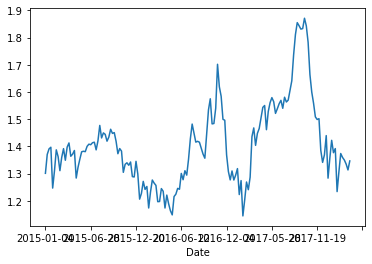

In [36]:
df_date.plot()
plt.show()

### 'region' 별로 데이터 몇개인지 시각화 하시오.

In [20]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [37]:
df['region'].nunique()

54

In [38]:
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [22]:
df['region'].value_counts()

Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth          338
M

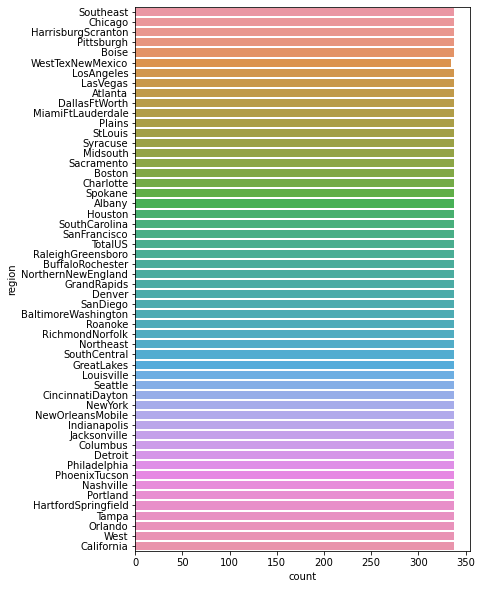

In [41]:
plt.figure(figsize = (6 , 10))
sns.countplot(data= df, y= 'region')
plt.show()

### 년도('year')별로 데이터가 몇건인지 확인하시오.

In [26]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [44]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


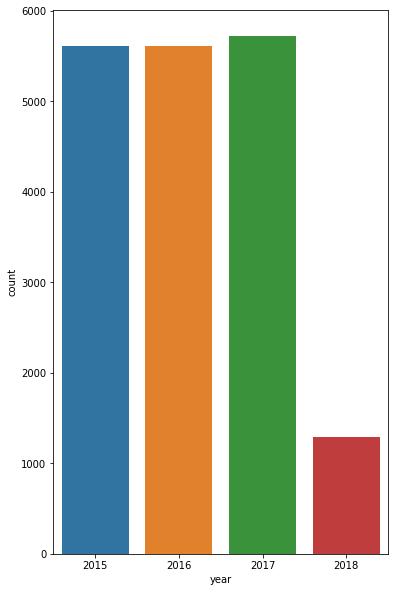

In [43]:
plt.figure(figsize = (6 , 10))
sns.countplot(data= df, x= 'year')
plt.show()

### 프로펫 분석을 위해, 두개의 컬럼만 가져오시오. ('Date', 'AveragePrice')

In [45]:


avocado_prophet_df = df[ ['Date', 'AveragePrice'] ]


In [46]:
avocado_prophet_df

,Date,AveragePrice
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


# STEP 3: Prophet 을 이용한 예측 수행

### ds 와 y 로 컬럼명을 셋팅하시오.

In [48]:
# 프로펫으로 예측하기 위해서는 컬럼명을 밑에처럼 바꿔야됨
avocado_prophet_df.columns = ['ds' , 'y']


In [49]:
avocado_prophet_df.head(3)

,ds,y
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68


### 프로펫 예측 하시오.

In [50]:
# 1. 변수로 만들고
prophet = Prophet()


In [51]:
# 2. 데이터로 학습 시키기
prophet.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
# 365일치를 예측하시오.
# 3. 예측하고자 하는 기간을 정해서, 비어있는 데이터 프레임 만들기
future = prophet.make_future_dataframe(periods= 365)
                                    #fred 디폴트가 'D'

In [54]:
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [56]:
# 4. 프로펫의 predict 함수에, 빈 데이터프레임을 넣어서 , 예측 데이터를 채운다.
forecast = prophet.predict(future)

In [57]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.931709,1.903423,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.905942,1.856910,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.893834,1.880205,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.843731,1.833352,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.837964,1.809237,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.578469,1.615586,0.978633,1.356002,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.572395,1.609213,0.977138,1.356630,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.572883,1.613624,0.975643,1.357065,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.572845,1.603881,0.974234,1.357072,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


In [ ]:
# 차트로 확인하시오.


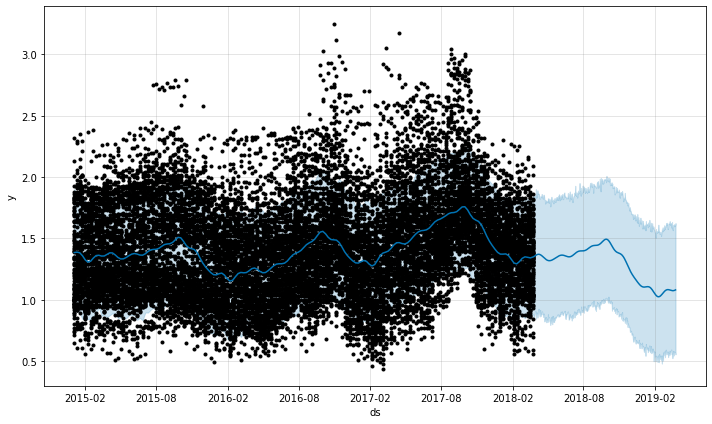

In [59]:
prophet.plot(forecast)
# 구글에 버그가있어서 2개가 나오는데 세이브픽 하면은 1개로 나옴
plt.savefig('chart1.jpg')

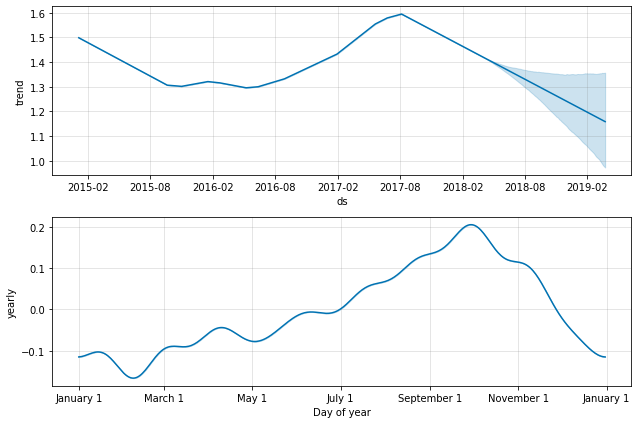

In [60]:
prophet.plot_components(forecast)
plt.savefig('chart2.jpg')

# PART 2 : region 이 west 인 아보카도의 가격을 예측하시오.

In [ ]:
avocado_df_sample = 

In [61]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [67]:
west_prophet = df.loc [ df['region'] == 'West' , ['Date' , 'AveragePrice'] ] 

In [69]:
west_prophet.columns = ['ds' , 'y']

In [70]:
west_prophet

,ds,y
51,2015-01-04,1.40
51,2015-01-04,0.89
50,2015-01-11,1.39
50,2015-01-11,0.95
49,2015-01-18,0.96
...,...,...
2,2018-03-11,1.00
1,2018-03-18,1.73
1,2018-03-18,0.99
0,2018-03-25,0.93


In [72]:
prophet = Prophet()

In [73]:
prophet.fit(west_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
west_future = prophet.make_future_dataframe(periods= 365)

In [77]:
prophet.predict(west_future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.286927,0.688425,1.546579,1.286927,1.286927,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,0.0,0.0,0.0,1.098474
1,2015-01-11,1.284678,0.693978,1.531889,1.284678,1.284678,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,0.0,0.0,0.0,1.112070
2,2015-01-18,1.282429,0.688691,1.557228,1.282429,1.282429,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,0.0,0.0,0.0,1.118372
3,2015-01-25,1.280180,0.671682,1.538532,1.280180,1.280180,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,0.0,0.0,0.0,1.104816
4,2015-02-01,1.277931,0.648248,1.513465,1.277931,1.277931,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,0.0,0.0,0.0,1.081489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.725261,1.095679,1.927557,1.693254,1.761432,-0.208252,-0.208252,-0.208252,-0.208252,-0.208252,-0.208252,0.0,0.0,0.0,1.517008
530,2019-03-22,1.725820,1.106911,1.964253,1.693612,1.762183,-0.203212,-0.203212,-0.203212,-0.203212,-0.203212,-0.203212,0.0,0.0,0.0,1.522608
531,2019-03-23,1.726380,1.117432,1.946503,1.693969,1.762930,-0.197601,-0.197601,-0.197601,-0.197601,-0.197601,-0.197601,0.0,0.0,0.0,1.528779
532,2019-03-24,1.726940,1.101865,1.955933,1.694327,1.763676,-0.191522,-0.191522,-0.191522,-0.191522,-0.191522,-0.191522,0.0,0.0,0.0,1.535418


In [81]:
avocado_df_sample = df.loc [ df['region'] == 'West' , ].copy()
                                                # 카피를 안하면 공유한다
                                                # 원인이 나면은 수정하기 에러없이 완벽한 코드 쓰려고 하지말기

In [79]:
avocado_df_sample

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [82]:
avocado_df_sample.rename(columns={'Date' : 'ds' , 'AveragePrice' : 'y'} , inplace=True)

In [83]:
avocado_df_sample

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [86]:
prophet = Prophet()

In [87]:
prophet.fit(avocado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
# 365일치
future1 = prophet.make_future_dataframe(periods= 365)

In [89]:
# 24주치
future2 = prophet.make_future_dataframe(periods= 24, freq='W')

In [91]:
forecast1 = prophet.predict(future1)

In [92]:
forecast2 = prophet.predict(future2)

In [93]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.286927,0.668511,1.485166,1.286927,1.286927,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,0.0,0.0,0.0,1.098474
1,2015-01-11,1.284678,0.670695,1.531915,1.284678,1.284678,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,0.0,0.0,0.0,1.112070
2,2015-01-18,1.282429,0.708071,1.541298,1.282429,1.282429,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,0.0,0.0,0.0,1.118372
3,2015-01-25,1.280180,0.695203,1.517134,1.280180,1.280180,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,0.0,0.0,0.0,1.104816
4,2015-02-01,1.277931,0.638604,1.493500,1.277931,1.277931,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,0.0,0.0,0.0,1.081489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.725261,1.083736,1.943724,1.689633,1.761841,-0.208252,-0.208252,-0.208252,-0.208252,-0.208252,-0.208252,0.0,0.0,0.0,1.517008
530,2019-03-22,1.725820,1.121666,1.949700,1.690035,1.762730,-0.203212,-0.203212,-0.203212,-0.203212,-0.203212,-0.203212,0.0,0.0,0.0,1.522608
531,2019-03-23,1.726380,1.102687,1.932317,1.690437,1.763614,-0.197601,-0.197601,-0.197601,-0.197601,-0.197601,-0.197601,0.0,0.0,0.0,1.528779
532,2019-03-24,1.726940,1.112165,1.925286,1.690839,1.764365,-0.191522,-0.191522,-0.191522,-0.191522,-0.191522,-0.191522,0.0,0.0,0.0,1.535418


In [94]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.286927,0.707915,1.525485,1.286927,1.286927,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,0.0,0.0,0.0,1.098474
1,2015-01-11,1.284678,0.686442,1.559115,1.284678,1.284678,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,0.0,0.0,0.0,1.112070
2,2015-01-18,1.282429,0.712573,1.544243,1.282429,1.282429,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,0.0,0.0,0.0,1.118372
3,2015-01-25,1.280180,0.669272,1.503078,1.280180,1.280180,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,0.0,0.0,0.0,1.104816
4,2015-02-01,1.277931,0.642887,1.498967,1.277931,1.277931,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,0.0,0.0,0.0,1.081489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2018-08-12,1.601572,1.403071,2.265055,1.593415,1.609565,0.224838,0.224838,0.224838,0.224838,0.224838,0.224838,0.0,0.0,0.0,1.826410
189,2018-08-19,1.605490,1.459690,2.298100,1.596704,1.614061,0.250759,0.250759,0.250759,0.250759,0.250759,0.250759,0.0,0.0,0.0,1.856249
190,2018-08-26,1.609407,1.468286,2.297362,1.600155,1.618762,0.278513,0.278513,0.278513,0.278513,0.278513,0.278513,0.0,0.0,0.0,1.887920
191,2018-09-02,1.613325,1.446073,2.330659,1.603230,1.623177,0.283156,0.283156,0.283156,0.283156,0.283156,0.283156,0.0,0.0,0.0,1.896481


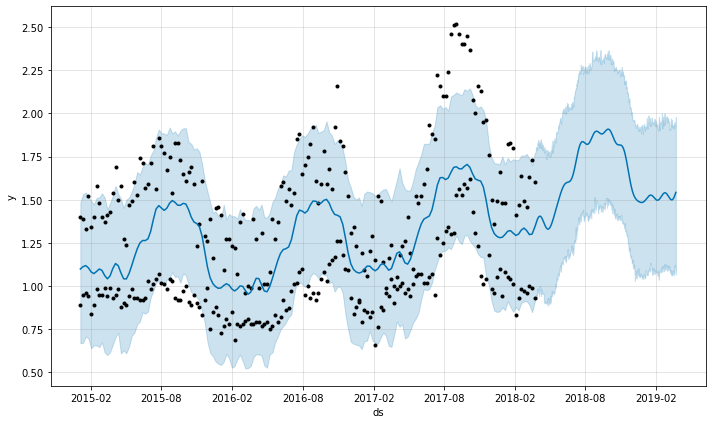

In [96]:
prophet.plot(forecast1)
plt.savefig('chart3.jpg')

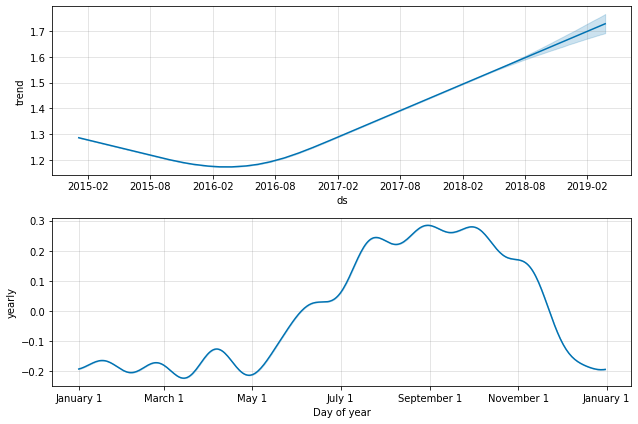

In [98]:
prophet.plot_components(forecast1)
plt.savefig('chart4.jpg')

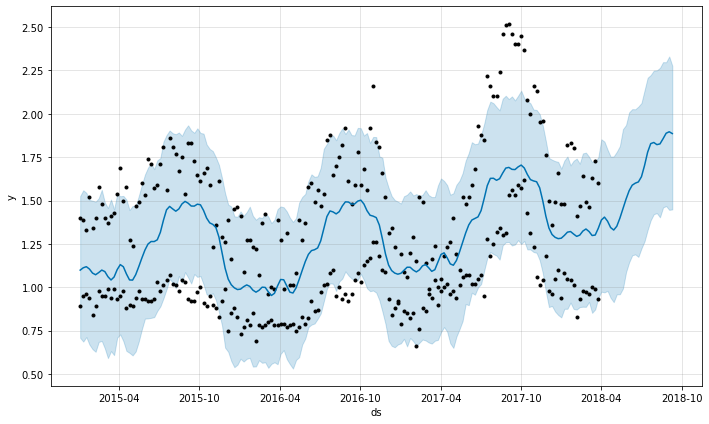

In [99]:
prophet.plot(forecast2)
plt.savefig('chart5.jpg')

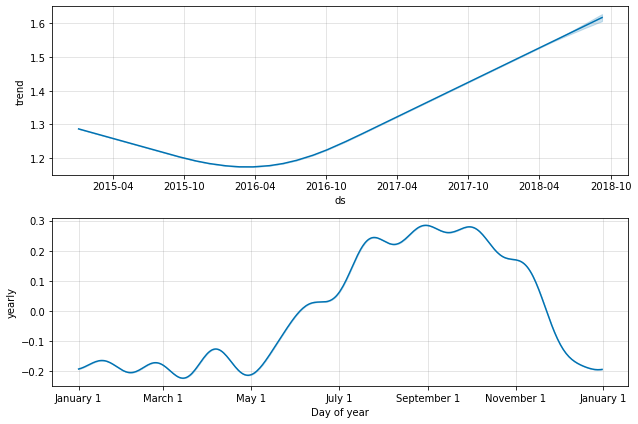

In [100]:
prophet.plot_components(forecast2)
plt.savefig('chart6.jpg')

# 결론??